<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/ML_Projects_Codes/CustomerSegmentClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segment Clustering using KMeans clustering**

#**Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

#**Data Collection & Pre-processing**

In [3]:
customer = pd.read_csv('/content/drive/MyDrive/Colab_python/Mall_Customers.csv')

# check
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# check information
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# check shape
customer.shape

(200, 5)

In [6]:
# check null
customer.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


* seems no null values exists

**Removing unwanted datas**

In [10]:
# wanted only
x = customer.iloc[:,[3,4]].values

# check first 5 rows
print(x[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


**Elbow Point Graph to choose best parameter**

In [11]:
# wcss - within in sum of squares

wcss = []

# choosing best out of 10
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(x)

    wcss.append(model.inertia_)

# check
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

#**Data Visualization**

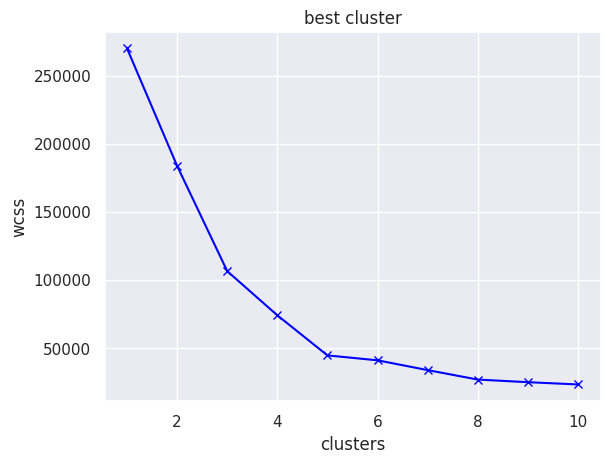

In [12]:
# wcss vs cluster visual

sns.set()

plt.plot(range(1,11),wcss,color='blue',marker='x')
plt.title('best cluster')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

* may notice, elbow point occurs in cluster 5.
* n_clusters = 5

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

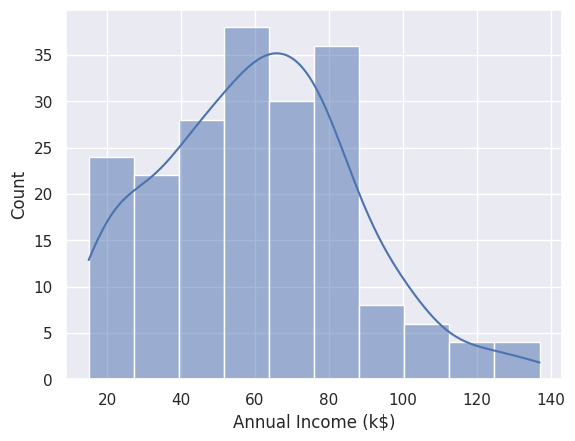

In [14]:
# distribution of annual income

sns.histplot(x='Annual Income (k$)',kde=True,data=customer)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

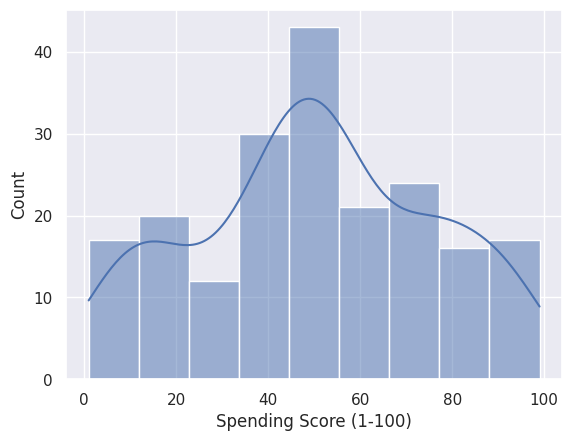

In [16]:
# distribution of spending score

sns.histplot(x='Spending Score (1-100)',kde=True,data=customer)

* seems, it is in normal distribution

#**Model Building**

**labels**

In [19]:
# getting labels from new instance with new parameter

model = KMeans(n_clusters=5,init='k-means++',random_state=42)

# label
label = model.fit_predict(x)

# check
print(label)
print('------------------------')

# centroids
centers = model.cluster_centers_
print(centers)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
------------------------
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


* 5 clusters - (0-4) labels

**Data Visualization of Clusters**

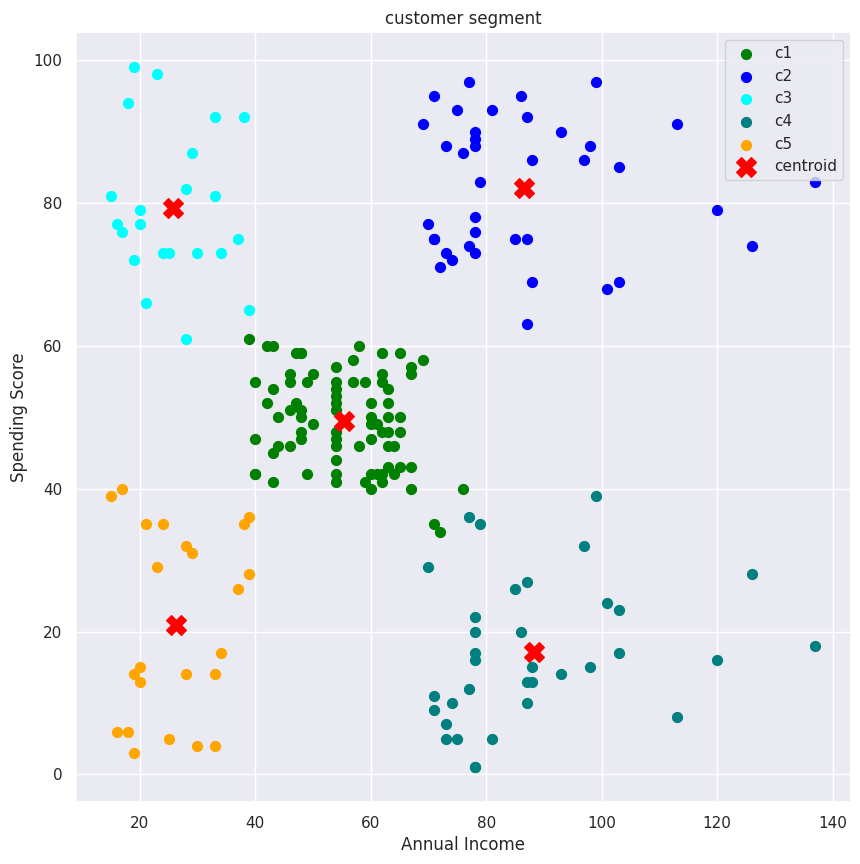

In [26]:
# cluster visual

plt.figure(figsize=(10,10))

plt.scatter(x[label==0,0],x[label==0,1],color='green',s=50,label='c1')
plt.scatter(x[label==1,0],x[label==1,1],color='blue',s=50,label='c2')
plt.scatter(x[label==2,0],x[label==2,1],color='cyan',s=50,label='c3')
plt.scatter(x[label==3,0],x[label==3,1],color='teal',s=50,label='c4')
plt.scatter(x[label==4,0],x[label==4,1],color='orange',s=50,label='c5')

# centroid

plt.scatter(centers[:,0],centers[:,1],color='red',s=200,marker='X',label='centroid')

plt.title('customer segment')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

**Inference: 'based on clustering', orange clusters states that people who have less annual income and less spending score, if we try to provide some offers, they can try to buy more offers. And also we need to maintain the frequency of people who have more annual income and spending score with them (blue clusters)**